<a href="https://colab.research.google.com/github/mozartMiBciBA/Data-Driven-Science-and-Engineering-ML-DySystems-and-Ctrl/blob/main/CH01_SEC02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementación del libro "Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control"

Fuente: https://www.youtube.com/watch?v=H7qMMudo3e8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=6


m:  2000 n:  1500


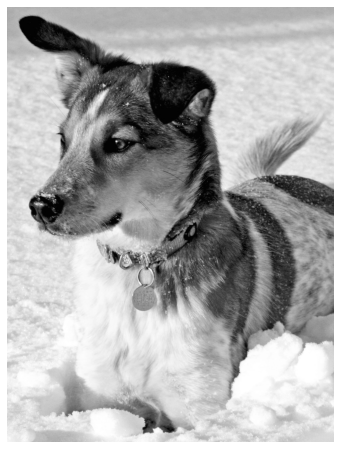

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


#A = imread(os.path.join('..','DATA','dog.jpg'))
A = imread(os.path.join('dog.jpg'))



X = np.mean(A, -1); # Convert RGB to grayscale
m, n = X.shape
print("m: ",m, "n: ", n)

img = plt.imshow(X)
#img = plt.imshow(A)
img.set_cmap('gray')
plt.axis('off')
plt.show()

U.shape
(2000, 1500)
S.shape
(1500, 1500)
VT.shape
(1500, 1500)


mUapprox:  2000 nUapprox:  5
mSapprox:  5 nSapprox:  5
mVTapprox:  5 nVTapprox:  1500
m_approx:  2000 n_approx:  1500



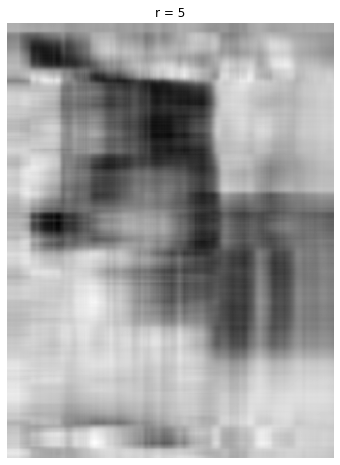


mUapprox:  2000 nUapprox:  50
mSapprox:  50 nSapprox:  50
mVTapprox:  50 nVTapprox:  1500
m_approx:  2000 n_approx:  1500



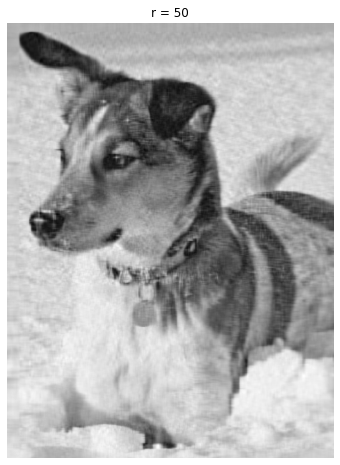


mUapprox:  2000 nUapprox:  100
mSapprox:  100 nSapprox:  100
mVTapprox:  100 nVTapprox:  1500
m_approx:  2000 n_approx:  1500



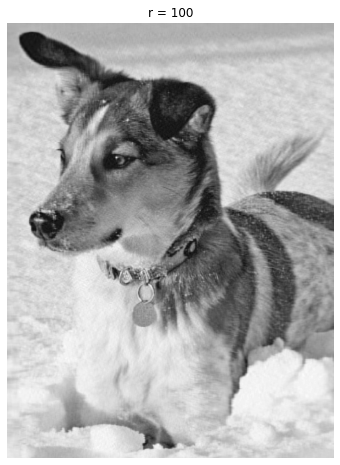

In [3]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

print("U.shape")
print(U.shape)

print("S.shape")
print(S.shape)

print("VT.shape")
print(VT.shape)
print("")

j = 0
for r in (5, 50, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1

    mUapprox, nUapprox = U[:,:r].shape
    mSapprox, nSapprox = S[0:r,:r].shape
    mVTapprox, nVTapprox = VT[:r,:].shape
    mapprox, napprox = Xapprox.shape
    
    print("")
    print("mUapprox: ", mUapprox, "nUapprox: ", nUapprox)
    print("mSapprox: ", mSapprox, "nSapprox: ", nSapprox)
    print("mVTapprox: ", mVTapprox, "nVTapprox: ", nVTapprox)
    print("m_approx: ",mapprox, "n_approx: ", napprox)
    print("")

    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

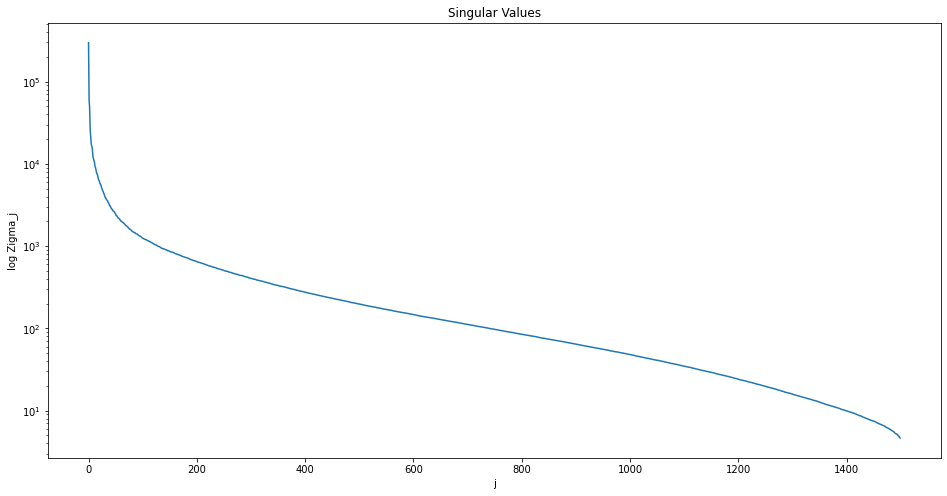

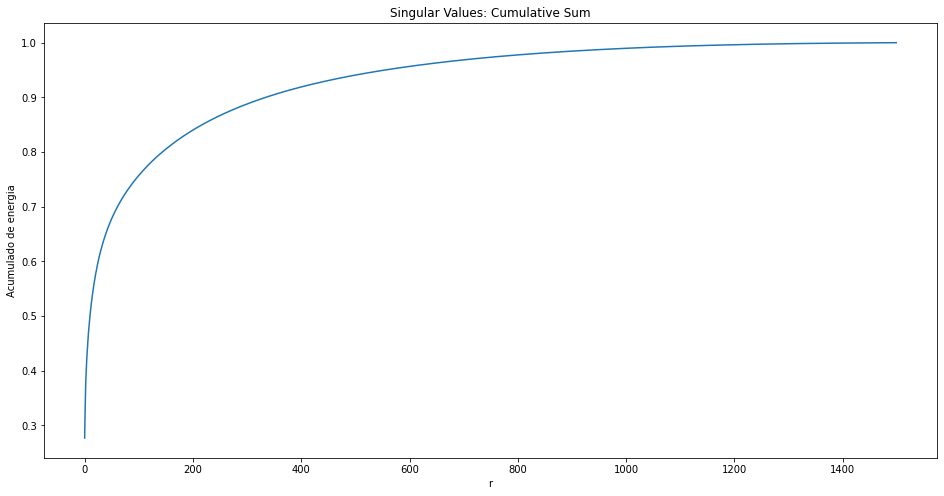

In [4]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.ylabel("log Zigma_j")
plt.xlabel("j")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.ylabel("Acumulado de energia")
plt.xlabel("r")
plt.show()